## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from collections import Counter

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# применим методы info() и describe() чтобы оценить исходные данные
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [2]:
print(df.head(10)) # вывод первых 10ти строк из исходной таблицы
print(df.isnull().sum()) # посчитаем количество пропусков в каждом столбце в исходных данных

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

### Вывод

Изучив данные можно сделать вывод, что мы имеем достаточно большое количество пропусков в исходной таблице, но не все из них мы, скорее всего, будем заполнять. Так же нам будет необходимо поменять тип данных для некоторых столбцов. Надо будет установить целочисленный тип для столбцов: floors_total, balcony, days_exposition. Для столбца first_day_exposition поменять формат с object на datetime.

## Предобработка данных

In [3]:
# Заполним пропуски в столбцах balcony, is_apartment и locality_name:
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)
df['locality_name'] = df['locality_name'].fillna('Неизвестно')

In [4]:
# Заполним пропуски в столбце ceiling_height средним значением:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean())

In [6]:
# Заполним пропуски в столбце living_area средним значением в зависимости от количества комнат в квартире:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('mean'))

In [7]:
# Заполним пропуски в столбце kitchen_area средним значением в зависимости от количества комнат в квартире:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('mean'))

# В наших данных нашлись студии, где указано количество комнат, равное 0.
# Для этих случаев заполним площадь кухни по формуле: (общая площадь - жилая площадь) / 2 - моё предположение исходит из того,
# что в студиях площадь нежилого помещения делится поровну между кухней и сан. узлом + корридором.
df['kitchen_area'] = df['kitchen_area'].fillna((df['total_area'] - df['living_area']) / 2)

print(df.isnull().sum()) # проверим, какие пропуски остались в наших данных.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [8]:
# Применим метод astype('int') для столбцов balcony и days_exposition, чтобы получить целочисленный тип значений:
df['balcony']=df['balcony'].astype('int')
# df['days_exposition']=df['days_exposition'].astype('int')

In [9]:
# Для столбца first_day_exposition поменяем формат с object на datetime:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

df.info() # проверим данные после обновления типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

### Вывод

Практически все пропуски в данных, которые должен был указывать пользователь, мы заполнили. Исключение - общая этажность дома (floors_total), в котором продается квартира. Её логически определить невозможно с нашими данными.

Пропущенные значения для столбца balcony мы заменили на 0, так как если пользователь не указал количество балконов, то можно предположить, что их нет.

Если пользователь не указал, что объект недвижимости является аппартаментами, значит пропущенные значения в столбце is_apartment логично заменить на FALSE.

Неуказанную локацию места нахождения объекта недвижимости заменили в данных на "Неизвестно".

Заполнили пропуски в столбцах: ceiling_height, days_exposition, living_area и kitchen_area.

Не заполняли пропуски в данных, которые получены автоматически на основе картографических данных.

Значения столбцов balcony и days_exposition привели к целочисленному типу данных.
Данные из столбца first_day_exposition привели к врменному формату - datetime64.

## Рассчёты и добавление результатов в таблицу

In [10]:
# Посчитаем стоимость квадратного метра и добавим ее в новый столбец price_per_meter:
df['price_per_meter'] = (df['last_price'] / df['total_area']).round().astype('int')

In [11]:
# Посчитаем соотношение жилой и общей площади, и добавим в новый столбец ratio_living_area_to_total_area:
df['ratio_living_area_to_total_area'] = df['living_area'] / df['total_area']

In [12]:
# Посчитаем соотношение площади кухни и общей площади, и добавим в новый столбец ratio_kitchen_area_to_total_area:
df['ratio_kitchen_area_to_total_area'] = df['kitchen_area'] / df['total_area']

In [13]:
# Заполним пропуски в столбце floors_total техническим значением, равным 0:
df['floors_total'] = df['floors_total'].fillna(0)

df['floors_total']=df['floors_total'].astype('int') # приведём к целочисленному типу

# Напишем функцию для определения названия этажа: первый, последний или другой.
def name_of_floor(df):
    if df['floor'] == 1:
        return 'первый'
    if df['floor'] == df['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Применим нашу функцию ко всему датафрэйму
df['name_of_floor'] = df.apply(name_of_floor, axis=1)

In [14]:
# Создадим словарь, в которой ключами будут числа от 1 до 12, а значениями - названия месяцев
months = {
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April', 
    5: 'May', 
    6: 'June', 
    7: 'July', 
    8: 'August', 
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Напишем функцию, которая будет возвращать значение по ключу словаря:
def date_of_publication_month(date):
    global month
    result = months.get(date.month)
    return result

In [15]:
# Добавляем 3 новых столбца, в которых будет указан день недели, месяц и год,
# когда было впервые опубликовано объявление:
df['date_of_publication_weekday'] = df['first_day_exposition'].dt.day_name()
df['date_of_publication_month'] = df['first_day_exposition'].apply(date_of_publication_month)
df['date_of_publication_year'] = df['first_day_exposition'].dt.year
print(df) # выведем таблицу со всеми новыми столбцами

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81           2017-03-21      3   
23695            14   3100000.0       59.00           2018-01-15      3   
23696            18   2500000.0       56.70           2018-02-11      2   
23697            13  11475000.0       76.75           2017-03-28      2   
23698             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.700000

### Вывод

В данном разделе мы произвели расчёт стоимости квадратного метра, отношение жилой площади к общей, отношение площади кухни к общей площади. Так же нам пришлось заполнить пропуски в столбце floors_total техническим значением, равным 0. Это нам было необходимо, чтобы провести категоризацию объявлений по этажу квартиры - добавили столбец, в котором указано: первый, последний или другой этаж. Помимо этого добавили информацию о том в какой день недели было опубликовано объявление, а так же месяц и год. Все данные были добавлены в отдельных столбцах к исходным данным.

## Исследовательский анализ данных

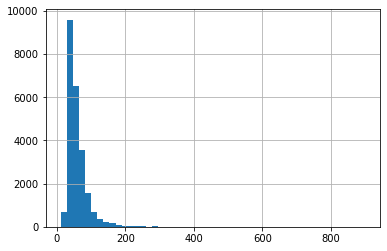

In [16]:
df['total_area'].hist(bins = 50) # построим гистограмму, где диапазон данных разделим на 50 корзин

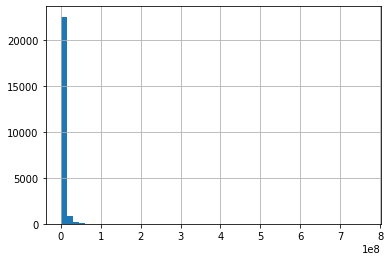

In [17]:
df['last_price'].hist(bins=50) # построим гистограмму, где диапазон данных разделим на 50 корзин

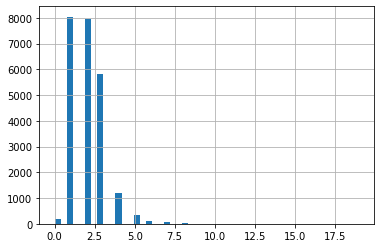

In [18]:
df['rooms'].hist(bins=50) # построим гистограмму, где диапазон данных разделим на 50 корзин

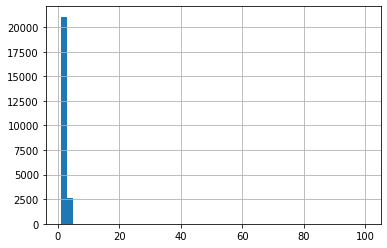

In [19]:
df['ceiling_height'].hist(bins=50) # построим гистограмму, где диапазон данных разделим на 50 корзин

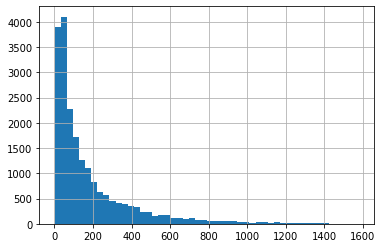

In [20]:
df['days_exposition'].hist(bins=50) # построим гистограмму, где диапазон данных разделим на 50 корзин

In [21]:
days_exposition_mean = df['days_exposition'].mean() # считаем среднее
days_exposition_median = df['days_exposition'].median() # считаем медиану
print('Среднее время продажи объекта недвижимости равно {:.2f} дней'.format(days_exposition_mean))
print('Медиана продажи объекта недвижимости равна {:.0f} дней'.format(days_exposition_median))

Среднее время продажи объекта недвижимости равно 180.89 дней
Медиана продажи объекта недвижимости равна 95 дней


#### Вывод о сроках продаж недвижимости:

Обычно сделки с недвижимостью занимают несколько месяцев. Быстрой продажей можно считать, когда сделка была проведена за месяц. Объекты недвижимости, которые продаются в течение нескольких лет (от года), можно считать очень долгими продажами.

In [22]:
# Создадим список с названием столбцов, в которых на гистограммах выше присутствуют вбросы
list_for_updates = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']

for element in list_for_updates: # объявим цикл для перебора названий столбцов
    print(df[element].describe()) # применим describe к требуемому столбцу, чтобы видеть его характеристики

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
count    23699.000000
mean         2.771499
std          0.986523
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1

In [23]:
# Избавимся от тех данных, который не попадают в наших столбцах в интервал:
for element in list_for_updates:
    q1 = df[element].quantile(0.25) # сохраним значение первого квартиля в переменную
    q3 = df[element].quantile(0.75) # сохраним значение третьего квартиля в переменную
    iqr = q3 - q1 # Интерквартильный размах
    df = df.loc[(df[element] >= (q1 - 2 * iqr)) & (df[element] <= (q3 + 4 * iqr))]
    print(df[element].describe()) # применим describe к требуемому столбцу, чтобы видеть его характеристики

count    23434.000000
mean        57.958637
std         25.977845
min         12.000000
25%         40.000000
50%         51.700000
75%         68.700000
max        189.000000
Name: total_area, dtype: float64
count    2.291000e+04
mean     5.380964e+06
std      3.140267e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.496500e+06
max      1.983700e+07
Name: last_price, dtype: float64
count    22910.000000
mean         2.000480
std          0.967385
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64
count    22559.000000
mean         2.720154
std          0.161057
min          2.300000
25%          2.600000
50%          2.771499
75%          2.771499
max          3.450000
Name: ceiling_height, dtype: float64
count    19369.000000
mean       162.129950
std        180.333829
min          1.000000
25%         44.000000
50%         91.000000
75%        215.000000
max        

In [24]:
# сделаем срез, чтобы отбросить одно единственное объявление, где стоимость ниже 400000 рублей:
df = df.query('last_price > 400000')

#### Вывод о выбивающихся значениях:

В исходных данных присутствовали вбросы, такие как высота потолков до 100 метров, количество комнат до 19ти, завышенные площади квартир и цены, объявления, которые висели по 4 года. Всё это искажало общую картину.

Быстрыми продажами можно считать те, когда объект недвижимости был куплен в течение 30 дней.
Долгими продажами можно считать те, когда недвижимость не могут продать год и более (> 365 дней). 

In [25]:
# заполним все пропуски техническим значением -999 в данных, 
# которые получены автоматически на основе картографических данных:
df.fillna(-99, inplace = True)

In [26]:
# Создадим список с названием столбцов, чтобы оценить зависит ли цена от площади, 
# числа комнат, удалённости от центра, на каком этаже расположена квартира: первом, последнем или другом.
# Также изучим зависимость от даты размещения: дня недели, месяца и года.
list_for_analyze = [
    'rooms',
    'name_of_floor',
    'date_of_publication_weekday',
    'date_of_publication_month',
    'date_of_publication_year'
]

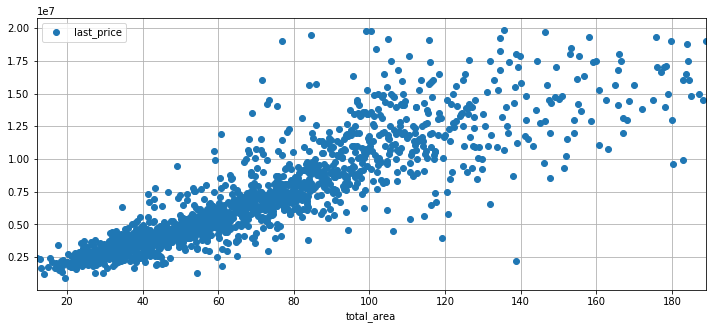

In [27]:
df.pivot_table(index='total_area', values='last_price').plot(style='o', grid=True, figsize=(12, 5))

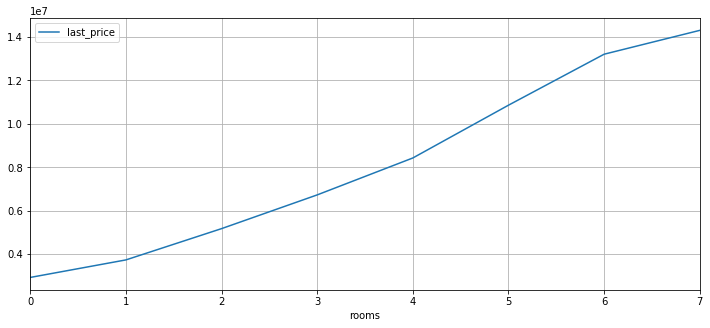

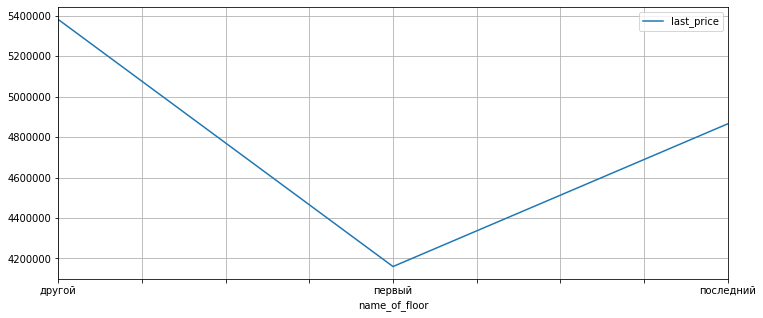

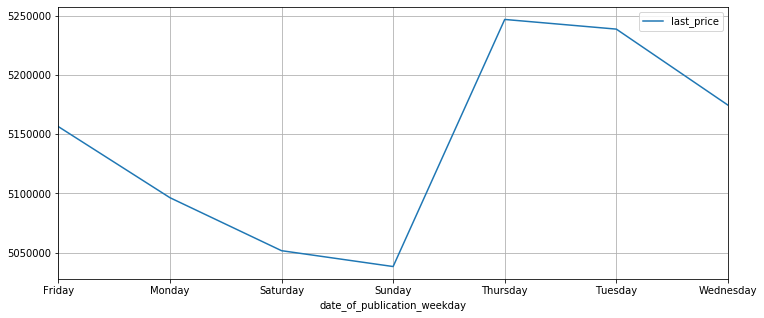

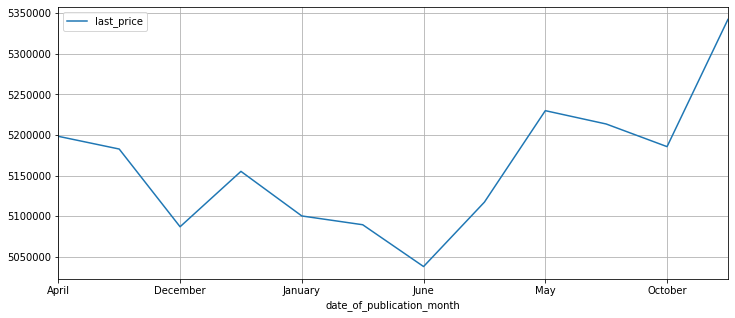

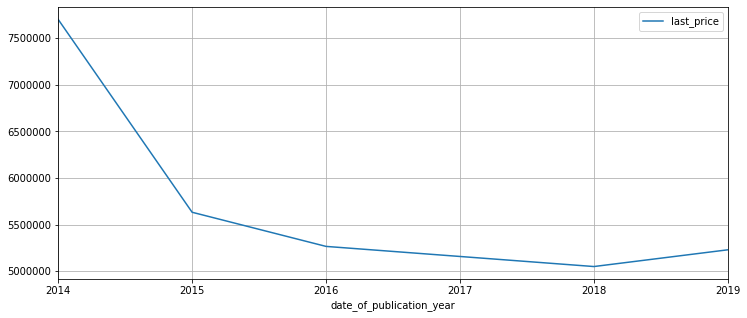

In [28]:
# объявим цикл по списку, по которому необходимо отследить зависимость цен на недвижимость
for element in list_for_analyze:
    # сведём в сводную таблицу данные цен в зависимости от каждого столбца из нашего списка
    df.pivot_table(index=element, values='last_price').plot(grid=True, figsize=(12, 5))

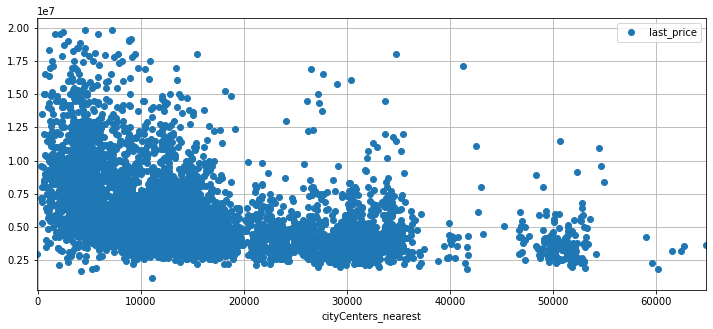

In [29]:
df.pivot_table(index='cityCenters_nearest', values='last_price').plot(style='o', grid=True, figsize=(12, 5))

#### Факторы больше всего влияют на стоимость квартиры:

Мы получили 7 графиков, на первых двух графиках прослеживается линейная зависимость: чем больше комнат и площадь - выше цена. В зависимости от этажа, самые дешевые объекты на первом этаже, дороже на последнем, и самые дорогие объявления из диапазона: не первый и не последний этаж. На 4ом графике видно, что самые низкие цены на объявлениях, которые были опубликованы в выходные дни. Так же низкие цены в объявлениях прослеживаются в июне месяце на 6ом графике. На предпоследнем графике видно, что самые высокие цены были в 2014 годы, а на протяжении 2016-2018 был спад в ценах. На последнем графике, где зависимость цен от удаленности от центра, пики цен на недвижимости ниже, при удалении от центра, но при этом минимальные цены остаются на одном уровне.

In [30]:
df['locality_name'] = df['locality_name'].str.lower() # все названия приведём к нижнем регистру

In [31]:
# Сохраним сваодную таблицу в отдельную переменную, посчитаем в ней среднее и количетсво объявлений:
top_locality_name = df.pivot_table(index='locality_name', values='price_per_meter', aggfunc=('mean', 'count'))
# Сортируем по количеству объявлений в порядке убывания: 
top_locality_name.sort_values(by = 'count', ascending=False, inplace=True)

top_ten_locality_name = top_locality_name[0:10] # срез из первых 10ти строк отсортированной таблицы.

print('Топ 10 городов по количеству объявлений: \n', top_ten_locality_name)

Топ 10 городов по количеству объявлений: 
                      count           mean
locality_name                            
санкт-петербург    12646.0  106791.066820
посёлок мурино       507.0   85912.571992
посёлок шушары       403.0   77911.059553
всеволожск           330.0   66779.160606
колпино              304.0   74680.407895
посёлок парголово    300.0   89591.366667
деревня кудрово      293.0   92413.726962
пушкин               286.0  100701.751748
гатчина              263.0   68106.049430
выборг               198.0   57208.904040


In [32]:
# отсортируем по средней стоимости квадратного метра
top_ten_locality_name = top_ten_locality_name.sort_values(by = 'mean', ascending=False)
print(top_ten_locality_name)

                     count           mean
locality_name                            
санкт-петербург    12646.0  106791.066820
пушкин               286.0  100701.751748
деревня кудрово      293.0   92413.726962
посёлок парголово    300.0   89591.366667
посёлок мурино       507.0   85912.571992
посёлок шушары       403.0   77911.059553
колпино              304.0   74680.407895
гатчина              263.0   68106.049430
всеволожск           330.0   66779.160606
выборг               198.0   57208.904040


#### 10 населённых пунктов с наибольшим числом объявлений:

По количеству объявление уверенное лидерство держит Санкт-Петербург, в нём же самая высокая средняя стоимость квадратного метра жилья. Замыкает список - Выборг со 192мя объявлениями и самой низкой сердней ценой за квадратный метр.

In [33]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000 # переводим метры в километры

# округляем и приводим к целым числам:
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round().astype('int')

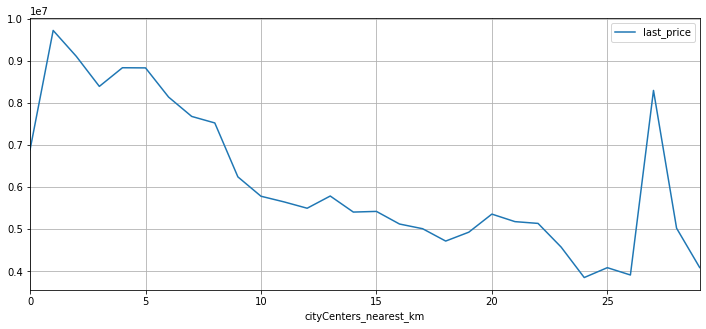

In [34]:
# срез по объектам недвижимости в Санкт-Петербурге, сведем в таблицу в зависимоти удаленности от центра
# и посчитаем среднюю цену недвижимости. Построим график зависимости средней цены от удаленности от центра
df.query('locality_name in "санкт-петербург"').pivot_table(
    index='cityCenters_nearest_km', values='last_price', aggfunc='mean'
).plot(grid=True, figsize=(12, 5))

#### Зависимости средней цены от удаленности от центра:

Согласно полученному графику: зону, в которой расположены объекты недвижимости в пределах 3км от центра, можно считать центральной. Так как на удаленности свыше 8км происходит более резкое снижение цен на недвижимость. Выделяется пик цен на удалённости в 20км от центра, возможно, это обусловленно наличием нового жилого комплекса комфорт класса, или присоединёнными территориями (~ Новая Москва).

In [35]:
# сохраним в отдельную переменную срез из нашей таблицы,
# где выберем все объекты в Санкт-Петербурге не дальше 3км от цента:
center_of_st_petersburg = df.query('locality_name in "санкт-петербург" & cityCenters_nearest_km <= 3')

count    523.000000
mean      78.989560
std       31.686469
min       12.000000
25%       55.000000
50%       75.400000
75%       97.000000
max      189.000000
Name: total_area, dtype: float64


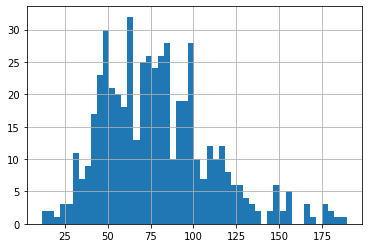

In [36]:
# Проанализируем данные по центру Санкт-Петербурга по общей площади недвижимости:
print(center_of_st_petersburg['total_area'].describe())
center_of_st_petersburg['total_area'].hist(bins=50)

count    5.230000e+02
mean     8.831013e+06
std      3.542427e+06
min      2.100000e+06
25%      6.200000e+06
50%      8.200000e+06
75%      1.078500e+07
max      1.980000e+07
Name: last_price, dtype: float64


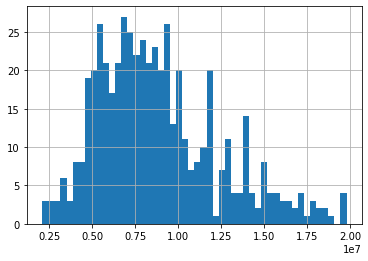

In [37]:
# Проанализируем данные по центру Санкт-Петербурга по цене недвижимости:
print(center_of_st_petersburg['last_price'].describe())
center_of_st_petersburg['last_price'].hist(bins=50)

count    523.000000
mean       2.774379
std        1.169026
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        7.000000
Name: rooms, dtype: float64


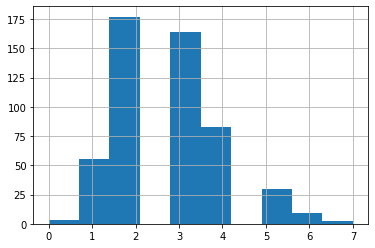

In [38]:
# Проанализируем данные по центру Санкт-Петербурга по числу комнат в объектах недвижимости:
print(center_of_st_petersburg['rooms'].describe())
center_of_st_petersburg['rooms'].hist(bins=10)

count    523.000000
mean       2.930011
std        0.224773
min        2.500000
25%        2.771499
50%        2.800000
75%        3.100000
max        3.450000
Name: ceiling_height, dtype: float64


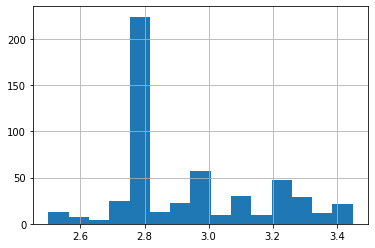

In [39]:
# Проанализируем данные по центру Санкт-Петербурга по высоте потолков в объектах недвижимости:
print(center_of_st_petersburg['ceiling_height'].describe())
center_of_st_petersburg['ceiling_height'].hist(bins=15)

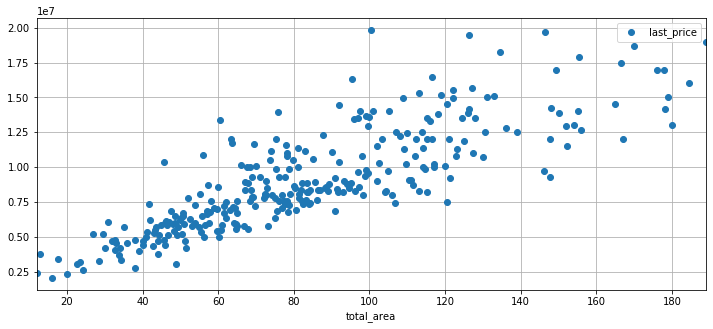

In [40]:
center_of_st_petersburg.pivot_table(index='total_area', values='last_price').plot(style='o', grid=True, figsize=(12, 5))

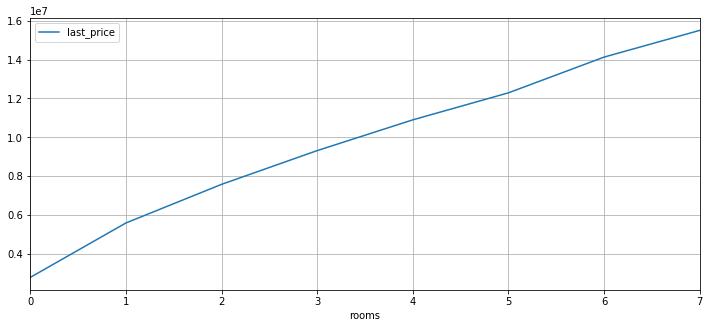

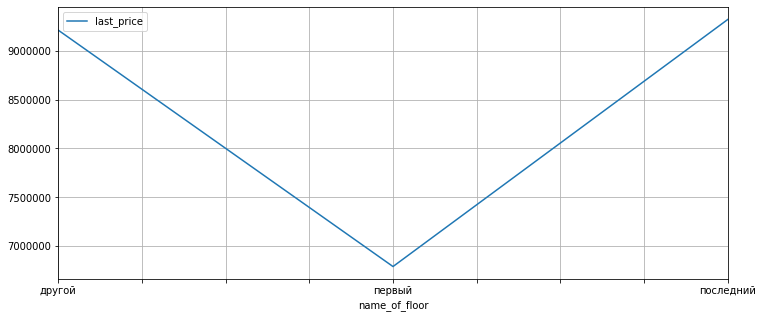

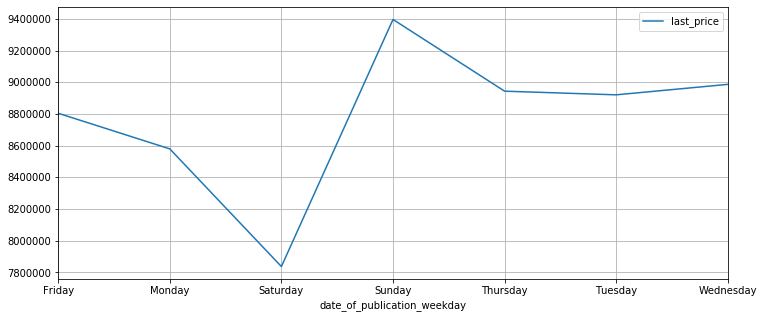

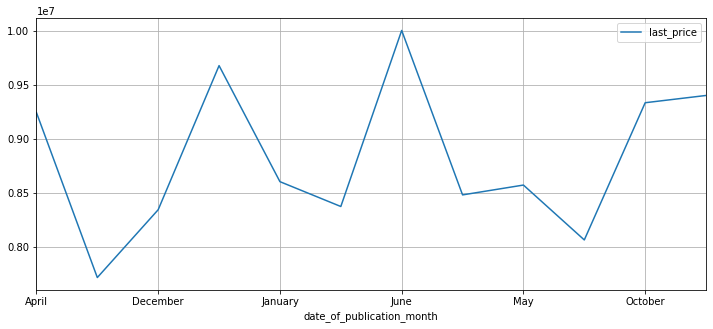

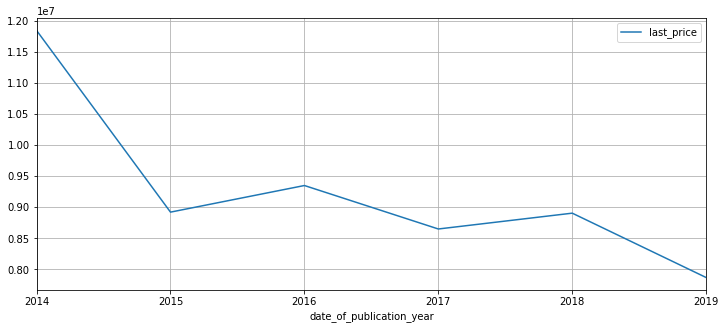

In [41]:
# объявим цикл по списку, по которому необходимо отследить зависимость цен на недвижимость
for element in list_for_analyze:
    # сведём в сводную таблицу данные цен в зависимости от каждого столбца из нашего списка
    center_of_st_petersburg.pivot_table(index=element, values='last_price').plot(grid=True, figsize=(12, 5))

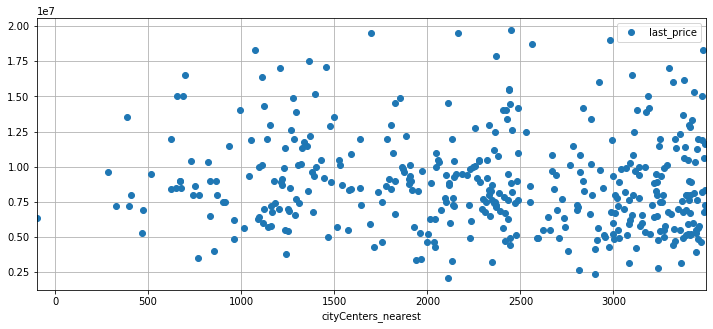

In [42]:
center_of_st_petersburg.pivot_table(index='cityCenters_nearest', values='last_price').plot(style='o', grid=True, figsize=(12, 5))

### Вывод

Сравнивая графики между собой (общие данные & данные по центру Санкт-Петербурга), можно сделать следующие выводы:
1) Цена недвижимости растёт при увеличении площади и кол-ва комнат (1 и 2 графики)
2) 3ий график - зависимость цены от этажа: первый этаж самый дешевый в обоих выборках, при этом последний этаж в центре Санкт-Петербурга ценится больше, чем последний этаж в общей выборке.
3) На последнем графике(зависимость цен от удалённости от центра): данные по центру Санкт-Петербурга находятся в боковике, в то время как график по общим данным показывает тенденцию к снижению.

## Общий вывод

In [43]:
# Выведем средние значения и медианы основных показателей недвижимости
# по общей выборке и по центру Санкт-Петербурга:
main_characteristics = [
    'last_price',
    'total_area',
    'rooms',
    'ceiling_height',
    'living_area',
    'kitchen_area']
for element in main_characteristics:
    print(element + '_mean =', df[element].mean())
    print(element + '_median =', df[element].median())
    print(element + '_center_mean =', center_of_st_petersburg[element].mean())
    print(element + '_center_median =', center_of_st_petersburg[element].median())

last_price_mean = 5164262.318876497
last_price_median = 4400000.0
last_price_center_mean = 8831013.191204589
last_price_center_median = 8200000.0
total_area_mean = 54.77682362660058
total_area_median = 49.9
total_area_center_mean = 78.9895602294455
total_area_center_median = 75.4
rooms_mean = 1.9482135481206113
rooms_median = 2.0
rooms_center_mean = 2.774378585086042
rooms_center_median = 3.0
ceiling_height_mean = 2.719638165164254
ceiling_height_median = 2.77149889685604
ceiling_height_center_mean = 2.930011041985912
ceiling_height_center_median = 2.8
living_area_mean = 31.343235100878495
living_area_median = 29.7
living_area_center_mean = 48.13214787371245
living_area_center_median = 45.4
kitchen_area_mean = 9.91959353993017
kitchen_area_median = 9.5
kitchen_area_center_mean = 12.72718217355561
kitchen_area_center_median = 10.4


Мы проанализировали объявления недвижимости в Санкт-Петербурге и его окрестностях. В исходных данных было много пропусков, но все пропуски можно было разделить на 2 категории: которые образовались из-за невнимательности пользователя и которые должны были быть получены автоматически. Первую категорию пропусков мы заполнили исходя из логических соображений, вторую категорию пропусков заменяли техническимми значениями, по мере того, когда она нам были необходимы для анализа. 
В данных присутствовали вбросы - объявления с аномальными значениями: ценой, площадью, количеством комнат, высотой потолков и т.п. Такие данные мы отбросили.
Провели сравнение двух выборок: общей выборки с данными по центру Санкт-Петербурга, помимо логичных закономернойстей (что с ростом площади и кол-ва комнат растёт цена, самая низкая цена для 1го этажа), обнаружили что в центре Санкт-Петербурга цена за недвижимость на последнем этаже не сильно отличается от других этажей.